# Ensemble of Unit Tests for python version of Okada (1992) scripts
Updated by George Lu on September 16, 2024


The base code is likely much slower than its FORTRAN counterparts, but it runs on Mac M1 chips. This notebook focuses on testing the code to make sure it's producing valid results. To test, we will test unit strike, dip, and tensile dislocations along with different dip angles ranging from 0 to 90 degrees. We will plot the resulting surface u_x, u_y, u_z displacements. 

The remaining setup geometry follows that of `test_okada.py` from [Ben Thompson's Okada wrapper scripts](https://github.com/tbenthompson/okada_wrapper/blob/master/test_okada.py). 

In [1]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.io
import sys
import os
sys.path.append(os.path.abspath('okada_python_scripts/..'))

from okada_python_scripts.DC3D import DC3D

In [2]:
# define a plotting function to plot u_x, u_y, u_z for a specific dip value
def plot_displacements(u_x,u_y,u_z,dip):
    fig , axs = plt.subplots(figsize=(10,2), ncols= 3, sharex = True, sharey = True,layout = 'constrained')

    cntrf = axs[0].pcolormesh(x, y, u_x,norm=colors.CenteredNorm(),cmap='RdBu_r')
    axs[0].set_xlabel(r'$\mathrm{x}$')
    axs[0].set_ylabel(r'$\mathrm{y}$')
    axs[0].set_title(r'$u_{\mathrm{x}}$')
    plt.colorbar(cntrf,ax=axs[0])

    cntrf = axs[1].pcolormesh(x, y, u_y,norm=colors.CenteredNorm(), cmap='RdBu_r')
    axs[1].set_xlabel(r'$\mathrm{x}$')
    #axs[1].set_ylabel(r'$\mathrm{y}$')
    axs[1].set_title(r'$u_{\mathrm{y}}$')
    plt.colorbar(cntrf,ax=axs[1])

    cntrf = axs[2].pcolormesh(x, y, u_z,norm=colors.CenteredNorm(), cmap='RdBu_r')
    axs[2].set_xlabel(r'$\mathrm{x}$')
    #axs[2].set_ylabel(r'$\mathrm{y}$')
    axs[2].set_title(r'$u_{\mathrm{z}}$')
    plt.colorbar(cntrf,ax=axs[2])

    fig.suptitle(f'Dip = {int(dip)}')

In [3]:
# using test from https://github.com/tbenthompson/okada_wrapper/blob/master/test_okada.py
# set constant values
source_depth = 3.0
obs_depth = 0
poisson_ratio = 0.25
mu = 1.0
patch_dim = [-0.6,0.6,-0.6,0.6] # al1, al2, aw1, aw2
lmda = 2 * mu * poisson_ratio / (1 - 2 * poisson_ratio)
alpha = (lmda + mu) / (lmda + 2 * mu)

n = (100,102,3) # 3 since testing 3 different dip values. I also make 102 points in the y dimension just to distinguish it from the x dimension
x = np.linspace(-1,1,n[0])
y = np.linspace(-1,1,n[1])

In [4]:
# initialize values of dip angles to test
dips = [0, 45, 90]


A note on how the DC3D subroutine is called. For an observation point x, y, z (z is negative), it calculates the u_x, u_y, u_z (along with strain) with the following:

`DC3D(ALPHA, X, Y, Z, SOURCE DEPTH, DIP, AL1, AL2, AW1, AL2, DISL1, DISL2, DISL3)`

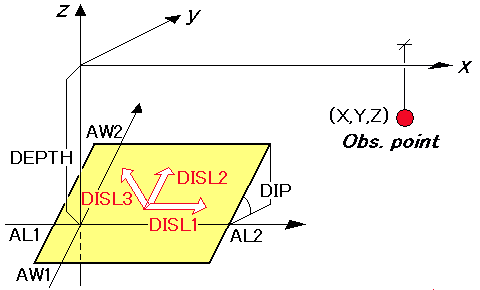

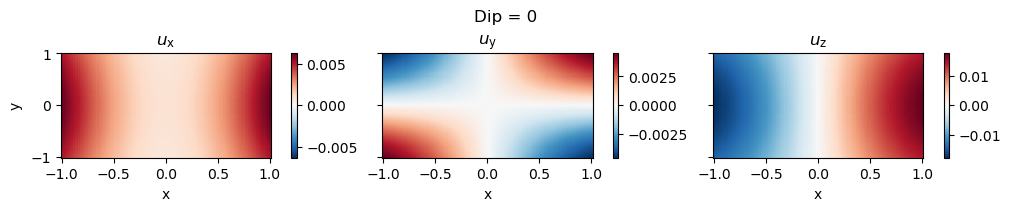

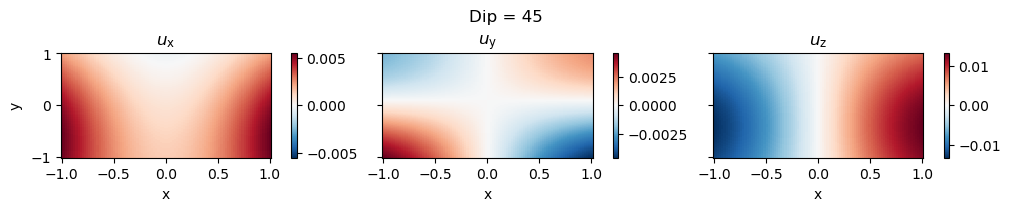

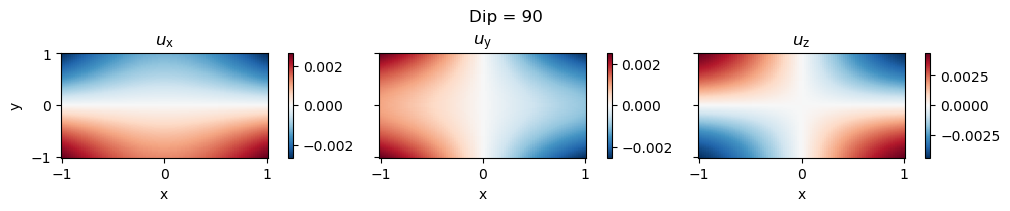

In [5]:
# run calculations for a strike slip of 1 
disl1 = 1 # strike
disl2 = 0 # dip
disl3 = 0 # tensile

ux_arr= np.zeros(n)
uy_arr = np.zeros(n)
uz_arr = np.zeros(n)
for k in range(n[2]):
    for i in range(n[0]):
        for j in range(n[1]):
                ux,uy,uz,uxx,uyx,uzx,uxy,uyy,uzy,uxz,uyz,uzz = DC3D(alpha,x[i],y[j],-obs_depth,source_depth,dips[k],patch_dim[0],patch_dim[1],patch_dim[2],patch_dim[3],disl1,disl2,disl3)
                ux_arr[i,j,k]=ux
                uy_arr[i,j,k]=uy
                uz_arr[i,j,k]=uz
    
    plot_displacements(ux_arr[:,:,k].T,uy_arr[:,:,k].T,uz_arr[:,:,k].T,dips[k])
    

In [6]:
# save these values into matlab file
scipy.io.savemat('strike_test.mat', {'ux': ux_arr, 'uy': uy_arr, 'uz': uz_arr, 'x':x, 'y':y, 'dips':dips})

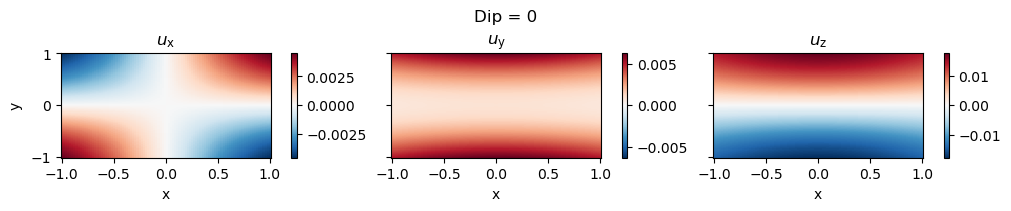

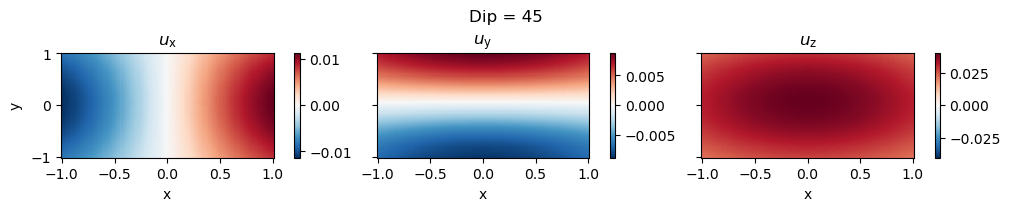

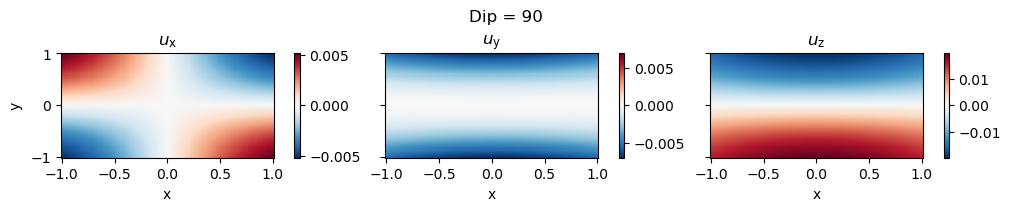

In [7]:
# run calculations for a dip slip of 1 
disl1 = 0 # strike
disl2 = 1 # dip
disl3 = 0 # tensile

ux_arr= np.zeros(n)
uy_arr = np.zeros(n)
uz_arr = np.zeros(n)
for k in range(n[2]):
    for i in range(n[0]):
        for j in range(n[1]):
                ux,uy,uz,uxx,uyx,uzx,uxy,uyy,uzy,uxz,uyz,uzz = DC3D(alpha,x[i],y[j],-obs_depth,source_depth,dips[k],patch_dim[0],patch_dim[1],patch_dim[2],patch_dim[3],disl1,disl2,disl3)
                ux_arr[i,j,k]=ux
                uy_arr[i,j,k]=uy
                uz_arr[i,j,k]=uz
    
    plot_displacements(ux_arr[:,:,k].T,uy_arr[:,:,k].T,uz_arr[:,:,k].T,dips[k])
    

In [8]:
# save these values into matlab file
scipy.io.savemat('dip_test.mat', {'ux': ux_arr, 'uy': uy_arr, 'uz': uz_arr, 'x':x, 'y':y, 'dips':dips})

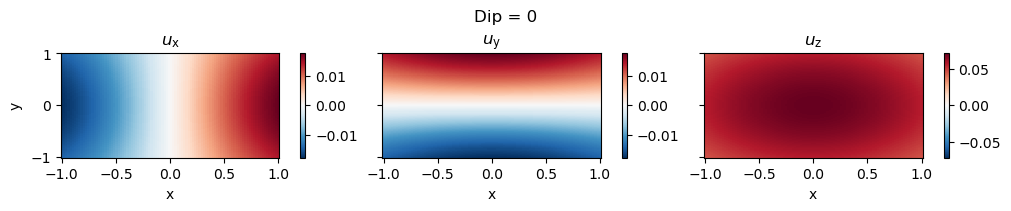

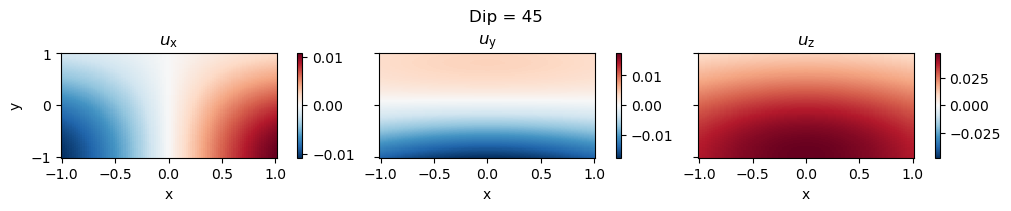

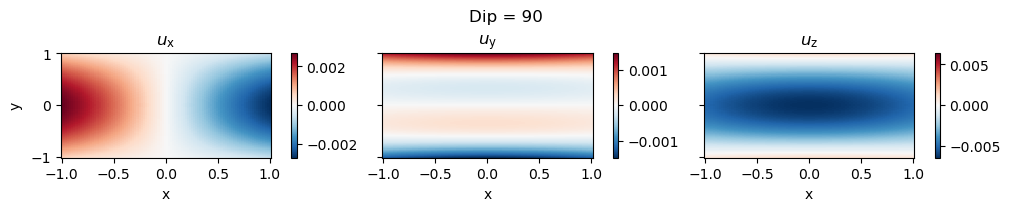

In [9]:
# run calculations for a tensile dislocation of 1 
disl1 = 0 # strike
disl2 = 0 # dip
disl3 = 1 # tensile

ux_arr= np.zeros(n)
uy_arr = np.zeros(n)
uz_arr = np.zeros(n)
for k in range(n[2]):
    for i in range(n[0]):
        for j in range(n[1]):
                ux,uy,uz,uxx,uyx,uzx,uxy,uyy,uzy,uxz,uyz,uzz = DC3D(alpha,x[i],y[j],-obs_depth,source_depth,dips[k],patch_dim[0],patch_dim[1],patch_dim[2],patch_dim[3],disl1,disl2,disl3)
                ux_arr[i,j,k]=ux
                uy_arr[i,j,k]=uy
                uz_arr[i,j,k]=uz
    
    plot_displacements(ux_arr[:,:,k].T,uy_arr[:,:,k].T,uz_arr[:,:,k].T,dips[k])
    

In [10]:
# save these values into matlab file
scipy.io.savemat('tensile_test.mat', {'ux': ux_arr, 'uy': uy_arr, 'uz': uz_arr, 'x':x, 'y':y, 'dips':dips})